In [20]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
#Basic
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

#Texts
import pymorphy2
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

#Plot
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

#Google disc
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

In [22]:
'''Функция для загрузки файло в google disc'''
def gdisk_download(id,file_name):
  
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(f'{file_name}') 

In [23]:
'''Функция, убирающая спецсимволы'''
spec_chars = string.punctuation + '«' + '»' + '—' #добавление доп спец симловов к базовым

def rem_spec_chars(text):
  return "".join([ch for ch in text if ch not in spec_chars])

In [24]:
'''Понижение регистра'''
def low(text):
  return [word.lower() for word in text.split()]

In [25]:
'''Функция лемматизации'''
morph = pymorphy2.MorphAnalyzer()
def lemmatize(text):
  return [morph.parse(word)[0].normal_form for word in text]

In [26]:
def remove_stop_words(text):
  return [word for word in text if word not in stop_words]

In [27]:
'''Загружаемый датасет'''
gdisk_download('1qNe415iRQvFF4kHxokbHFOtzpdaqEY5q',
               'data.csv')
df = pd.read_csv('data.csv')
df.head(10)

,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,rating
0,1535264014682530048,2022-06-10,postnauka_ru,Этот материал — часть проекта «Мир особенного ...,0,0,0,[],"""Абсолют-помощь""",1
1,1386684692829721088,2021-04-26,asi_russia,Фонд «Абсолют-помощь» объявил грантовый #конку...,0,1,0,"['конкурс', 'нко']","""Абсолют-помощь""",1
2,1282275681242676992,2020-07-12,mgytaujd2j8amho,Фонд «Дорога к Дому» компании «Северсталь» пол...,0,0,0,[],"""Абсолют-помощь""",2
3,1261179391922576896,2020-05-15,civil_73,"Грантовый конкурс, который проводит Благотвори...",0,0,0,[],"""Абсолют-помощь""",1
4,1255526737506643968,2020-04-29,disliferu,Благотворительный фонд «Абсолют-Помощь» запуст...,0,0,1,[],"""Абсолют-помощь""",2
5,1123483958870774016,2019-05-01,kstnm0fsrsnixwt,Лучшие благотворительные фонды по версии журна...,0,0,0,[],"""Абсолют-помощь""",2
6,1114766259202264960,2019-04-07,fox_nasty,"Конкурс социальных проектов ""Повышение компете...",0,0,0,[],"""Абсолют-помощь""",2
7,1106137680310611968,2019-03-14,nko37ru,⚡ Открыт прием заявок на конкурс социальных пр...,0,0,0,[],"""Абсолют-помощь""",2
8,1018754362217287936,2018-07-16,vsekonkursy,Конкурс социальных проектов для особенных дете...,0,0,0,[],"""Абсолют-помощь""",2
9,1017101471517725056,2018-07-11,chehovchanka,#Фонд «#Абсолют-Помощь» объявляет #конкурс про...,0,0,0,"['фонд', 'абсолют', 'конкурс']","""Абсолют-помощь""",2


In [28]:
'''Маркировка классов'''
class_names = {0: 'Отрицательный твит', 1: 'Нейтральный твит', 2: 'Положительный твит'}

In [29]:
df['twet_context'] = df['rating'].map(class_names)
print(df.info())
df.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1762 non-null   int64 
 1   date            1762 non-null   object
 2   username        1762 non-null   object
 3   tweet           1762 non-null   object
 4   replies_count   1762 non-null   int64 
 5   retweets_count  1762 non-null   int64 
 6   likes_count     1762 non-null   int64 
 7   hashtags        1762 non-null   object
 8   fond_name       1762 non-null   object
 9   rating          1762 non-null   int64 
 10  twet_context    1762 non-null   object
dtypes: int64(5), object(6)
memory usage: 151.5+ KB
None


,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,rating,twet_context
1174,337991017175330816,2013-05-24,mopikalevo,Фонд Олега Дерипаска «Вольное Дело» и Союз жен...,0,0,0,[],"""Вольное дело""",1,Нейтральный твит
142,1248501275135578112,2020-04-10,2505lis,Чего хотят:отдать по доброму в дар нуждающимся...,0,1,1,[],"""Дар""",0,Отрицательный твит
947,496550674407378880,2014-08-05,businessprokra,,0,0,0,[],"""Вольное дело""",1,Нейтральный твит
285,1412656385192600064,2021-07-07,19rusinfo,Фонд Михаила Прохорова поддержал проекты абака...,0,0,0,[],Фонд Прохорова,2,Положительный твит


Убираем спец символы

In [31]:
df['tweet_lem'] = df['tweet'].progress_apply(rem_spec_chars)

100%|██████████| 1762/1762 [00:00<00:00, 31474.61it/s]


Подгтовка текста, перевод всех букв в нижний регистр

In [32]:
df['tweet_lem'] = df['tweet_lem'].progress_apply(low)

100%|██████████| 1762/1762 [00:00<00:00, 53626.03it/s]


Лематизация текста

In [33]:
df['tweet_lem'] = df['tweet_lem'].progress_apply(lemmatize)

100%|██████████| 1762/1762 [00:20<00:00, 86.60it/s]


#### Убираем стоп-слова

In [35]:
nltk.download('stopwords')
russian_stopwords = stopwords.words("russian")
english_stopwords = stopwords.words("english")
stop_words = russian_stopwords + english_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


К стоп словам добавляем все слова которые в нашем контексте не несут смысловой нагрузки. Т.е. убираем слово "фонд" т.к. мы знаем что мы анализируем фонды и это слово будет постоянно встечаться.

In [36]:
stop_words.extend(['фонд', 'благотворительный', 'абсолют-помощь', 'агат', 'базис', 'дар',
                          'хамовник', 'искусство', 'наука', 'спорт', 'прохоров', 'михаил', 'мпрохоров', 'м',
                          'мельниченко', 'андрей', 'муслим', 'магомаев', 'ноосфера', 'наш', 'нашебудущий', 
                          'будущее', 'рыбаковфонд', 'рыбак', 'сафмара', 'свет', 'дерипаск', 'олег', 
                          'вольный', 'дело', 'тимченко', 'геннадий', 'благотворительный', 'елена',
                          'жизнь', 'фонд', 'подарить', 'хаматовый', 'чулпан', 'актриса', 
                          'потанин', 'владимир', 'фондпотанин', 'фондмихаилапрохоров', 'абсолютпомощь',
                          'это', 'год', 'і', 'iii', 'алишер', 'усманов', 'который', 'фондтимченко', 'инс',
                          '12', 'всё'])

In [37]:
df['tweet_lem'] = df['tweet_lem'].progress_apply(remove_stop_words)

100%|██████████| 1762/1762 [00:00<00:00, 2299.70it/s]


In [39]:
df[['tweet','tweet_lem']].sample(5)

,tweet,tweet_lem
1207,Один из бенефициаров сделки Олега Дерипаски с ...,"[бенефициар, сделка, минфин, сша, –, поддержив..."
1570,Фонд Потанина пожертвует 68 млн рублей в росси...,"[пожертвовать, 68, млн, рубль, российский, энд..."
209,"АСИ и Фонд «Искусство, наука и спорт» представ...","[ася, представлять, новый, глава, путеводитель..."
1348,Специалисты учреждения приняли участие во Всер...,"[специалист, учреждение, принять, участие, все..."
1228,В переулке мечты города Губахи Пермского края ...,"[переулок, мечта, город, губаха, пермский, кра..."


In [42]:
fonds = df['fond_name'].unique().tolist()

Строим частотный анализ слов. Оставляем только ТОП 10 слов

In [44]:
fond_words_voc = {}
for j in tqdm(df['twet_context'].unique()):
  fond_words_voc[j] = dict()

100%|██████████| 3/3 [00:00<00:00, 20164.92it/s]


In [45]:
for r in fond_words_voc.keys():
  for i in fonds:
    fond_words_voc[r][i] = list()

In [46]:
for r in fond_words_voc.keys():
  for j in fond_words_voc[r].keys():
    for i in df[(df['fond_name'] == j) & (df['twet_context'] == r)].tweet_lem:
      for w in i:
        fond_words_voc[r][j].append(w)

In [47]:
most_words_by_fond = {}
for j in tqdm(fond_words_voc.keys()):
  most_words_by_fond[j] = dict()

100%|██████████| 3/3 [00:00<00:00, 25471.48it/s]


In [48]:
for r in fond_words_voc.keys():
  for i in fond_words_voc[r].keys():
    most_words_by_fond[r][i] = FreqDist(fond_words_voc[r][i]).most_common(10) #цифра 10 указывает количество оставляемых слов

In [ ]:
most_words_by_fond

Построим облако слов для всех фондов

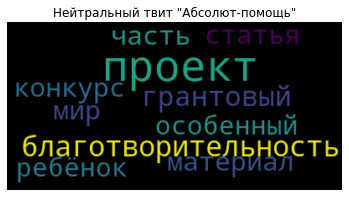

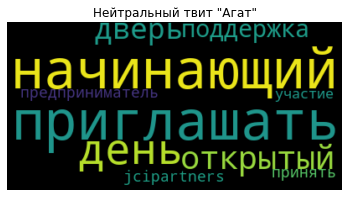

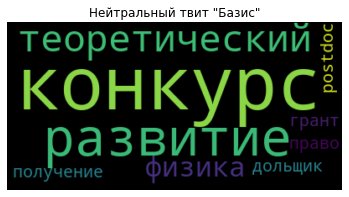

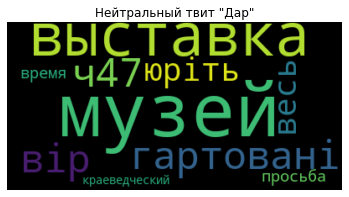

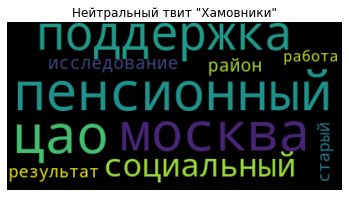

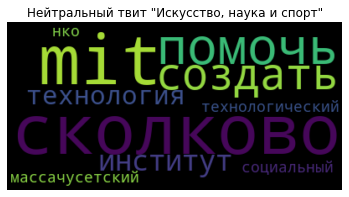

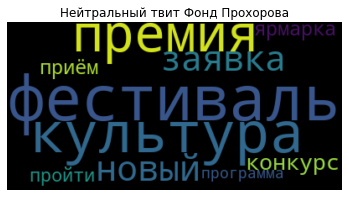

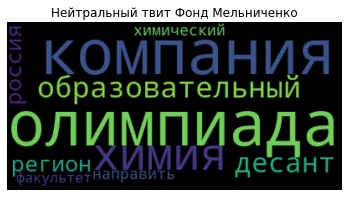

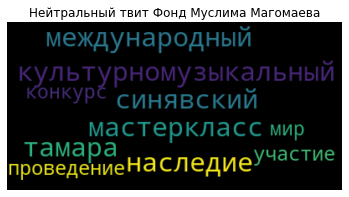

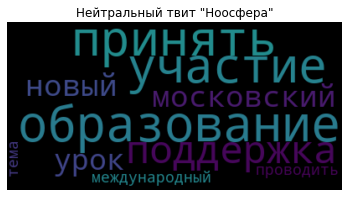

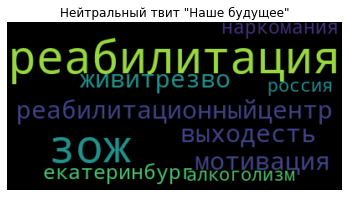

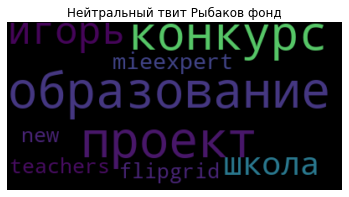

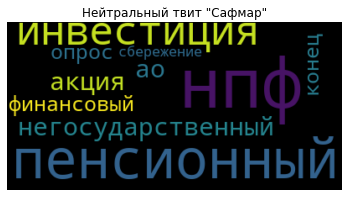

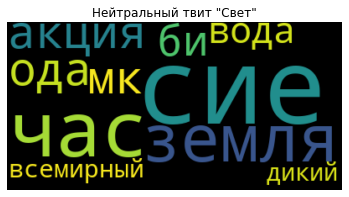

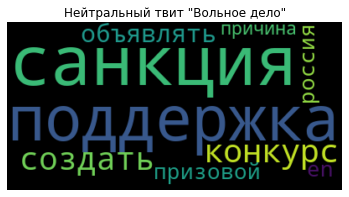

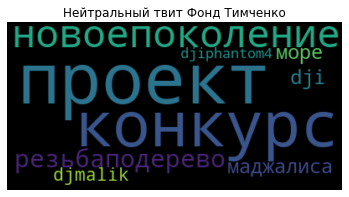

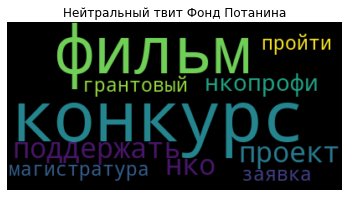

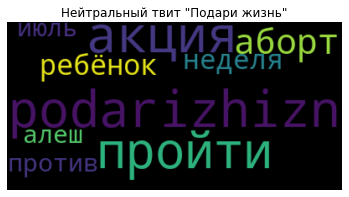

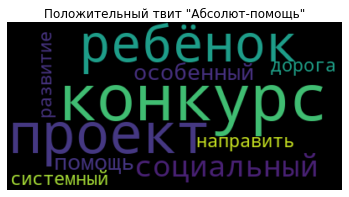

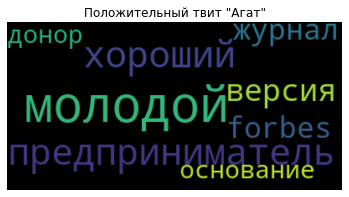

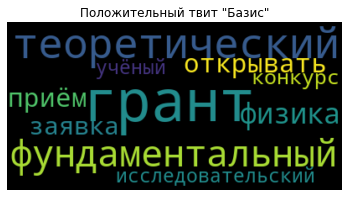

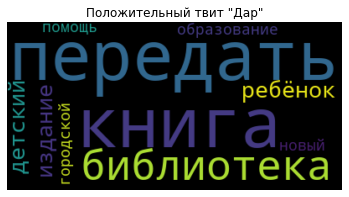

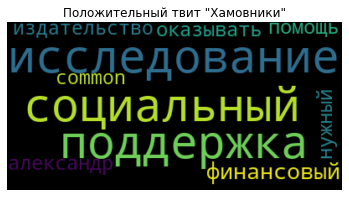

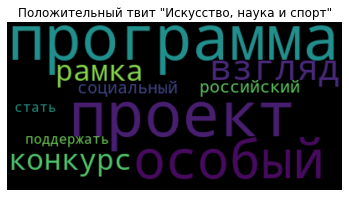

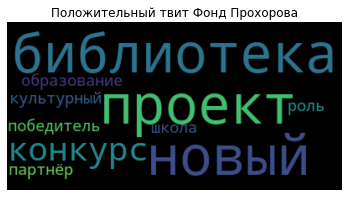

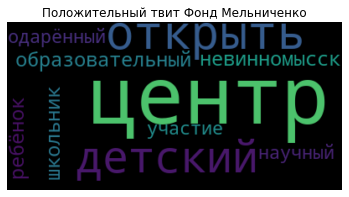

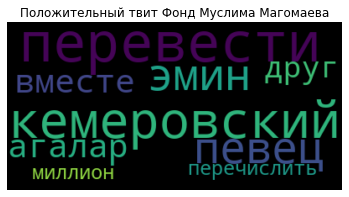

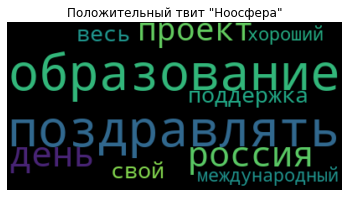

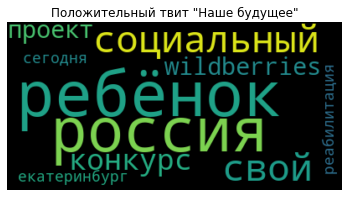

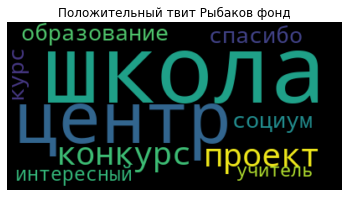

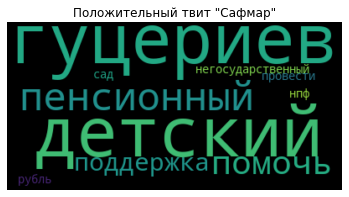

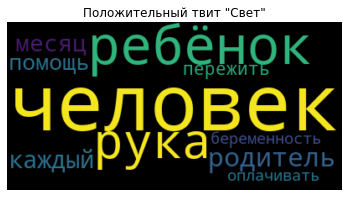

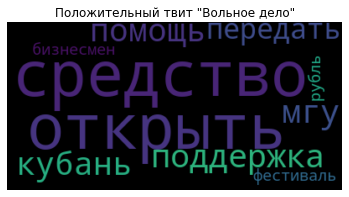

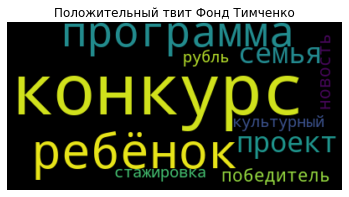

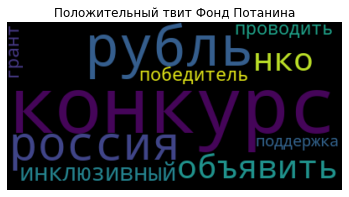

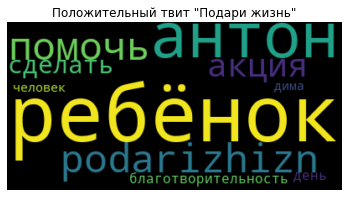

Отрицательный твит "Абсолют-помощь"


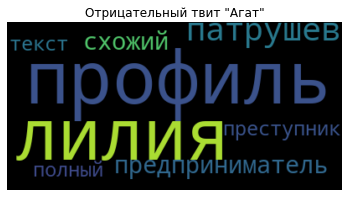

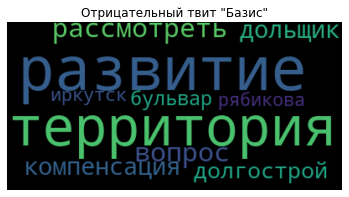

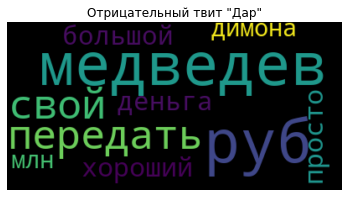

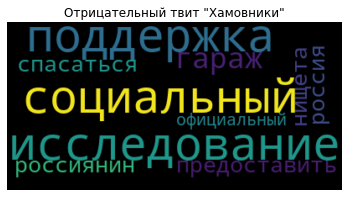

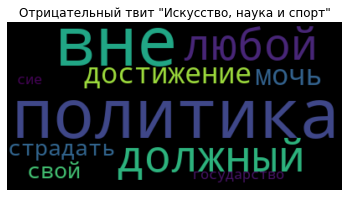

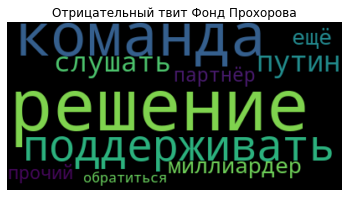

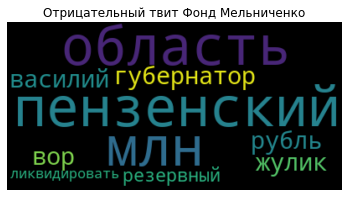

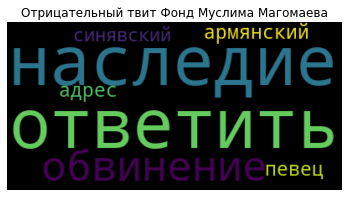

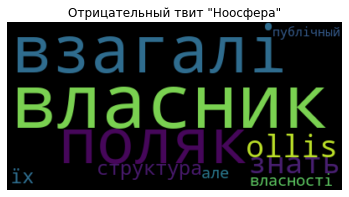

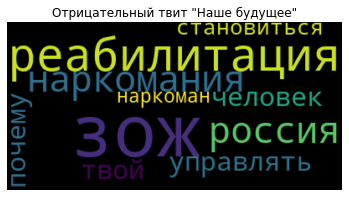

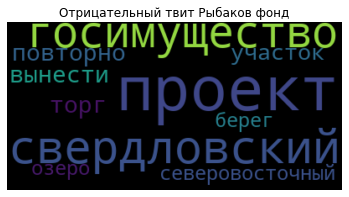

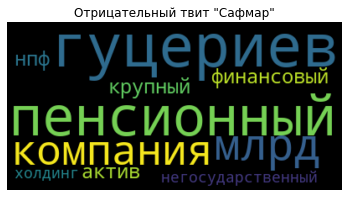

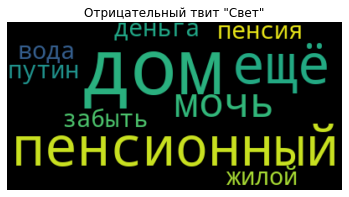

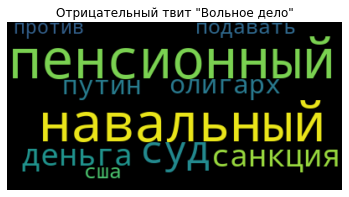

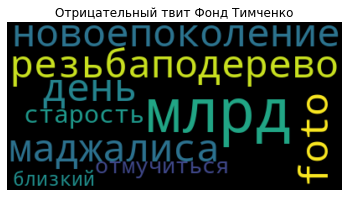

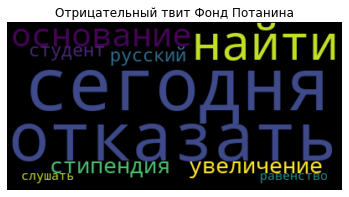

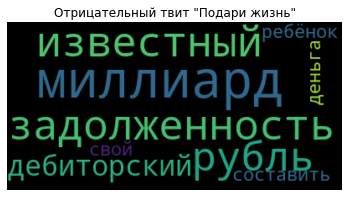

In [51]:
for r in fond_words_voc.keys():
  for i in fond_words_voc[r].keys():
    lst = []
    for j in most_words_by_fond[r][i]:
      lst.append(j[0])
    text_raw = " ".join(lst)
    try:
      wordcloud = WordCloud().generate(text_raw)

      plt.imshow(wordcloud, interpolation='bilinear')
      plt.title(r + ' ' + i)
      plt.axis("off")
      plt.show()
    except:
      print(r + ' ' + i)

#### Все самые частые слова по фондам

In [58]:
fond_words_voc_2 = {}
for j in tqdm(fonds):
  fond_words_voc_2[j] = list()

100%|██████████| 18/18 [00:00<00:00, 19191.02it/s]


In [59]:
for j in tqdm(fonds):
  for i in df[df['fond_name'] == j].tweet_lem:
    for w in i:
      fond_words_voc_2[j].append(w)

100%|██████████| 18/18 [00:00<00:00, 585.44it/s]


In [60]:
most_words_by_fond_2 = {}

In [61]:
for i in fond_words_voc_2.keys():
  most_words_by_fond_2[i] = FreqDist(fond_words_voc_2[i]).most_common(10)

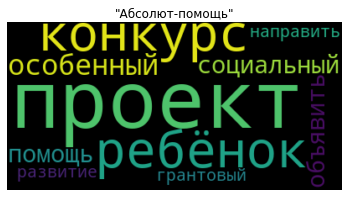

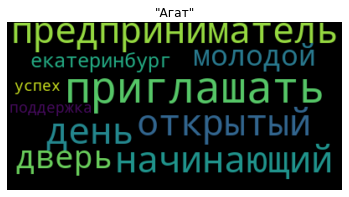

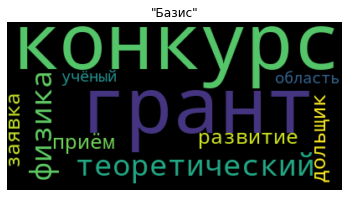

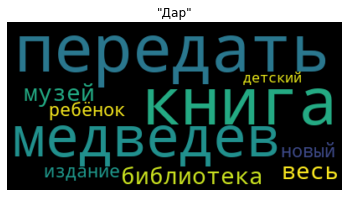

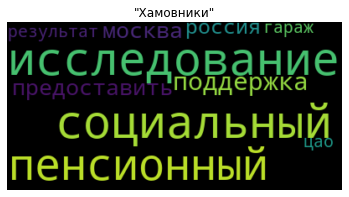

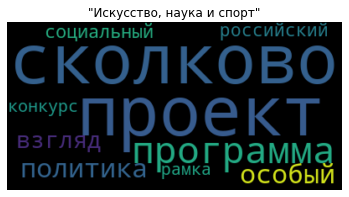

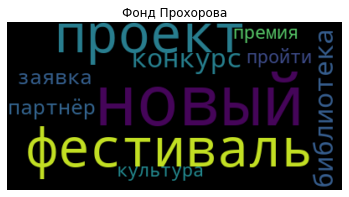

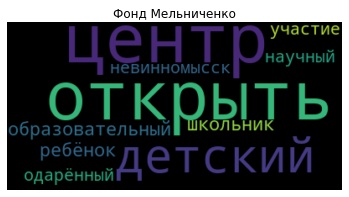

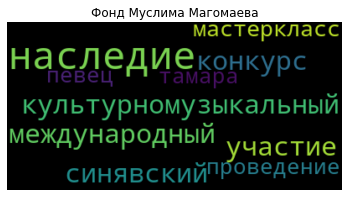

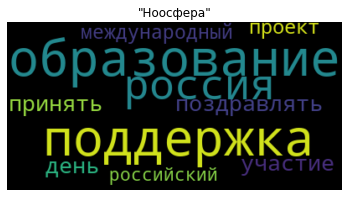

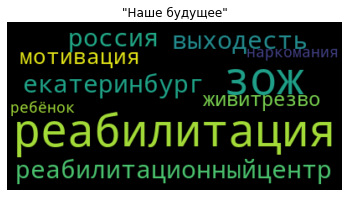

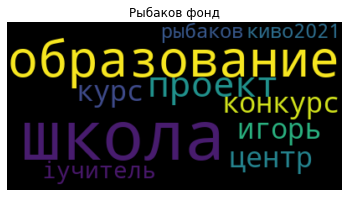

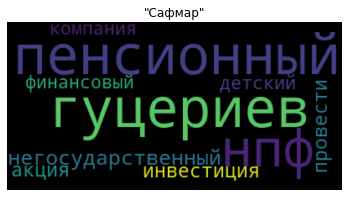

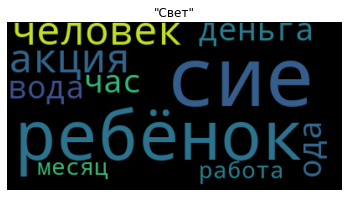

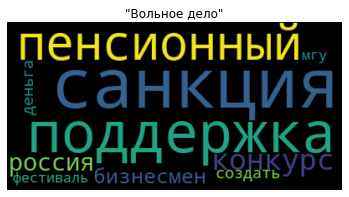

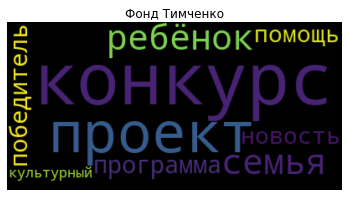

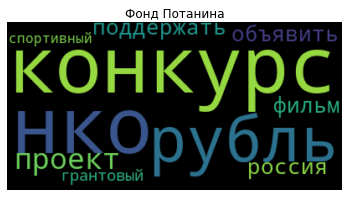

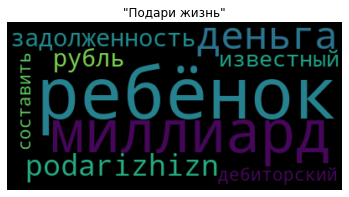

In [62]:
for i in fond_words_voc_2.keys():
  lst = []
  for j in most_words_by_fond_2[i]:
    lst.append(j[0])
  text_raw = " ".join(lst)
  wordcloud = WordCloud().generate(text_raw)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(i)
  plt.axis("off")
  plt.show()